# Six Shapes Classification with Machine Learning (TFJs)

- Repository : https://github.com/reevald/MathEdu
- Dataset : https://github.com/reevald/MathEdu/raw/main/dataset/six-shapes-dataset-v2.zip

## Import Libraries

In [ ]:
import zipfile
import os
import random
import math
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from google.colab import files
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 1.9 MB/s eta 0:00:011


## Preparation Data with ETL (Extract, Transform, Load)

### Extract Dataset

In [1]:
# Downloading the dataset
!wget --no-check-certificate \
  https://github.com/reevald/MathEdu/raw/main/dataset/six-shapes-dataset-v2.zip \
  -O /tmp/six-shapes-dataset-v2.zip

--2021-09-03 11:33:17--  https://github.com/reevald/MathEdu/raw/main/dataset/six-shapes-dataset-v2.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/reevald/MathEdu/main/dataset/six-shapes-dataset-v2.zip [following]
--2021-09-03 11:33:17--  https://raw.githubusercontent.com/reevald/MathEdu/main/dataset/six-shapes-dataset-v2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34834011 (33M) [application/zip]
Saving to: ‘/tmp/six-shapes-dataset-v2.zip’

/tmp/six-shapes-dat 100%[===================>]  33.22M   162MB/s    in 0.2s    

2021-09-03 11:33:18 (162 MB/s) - ‘/tmp/six-shapes-dataset-v

In [ ]:
# Extract the downloaded zip file
local_zip = '/tmp/six-shapes-dataset-v2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
# Check dataset directory
base_dir = '/tmp/six-shapes'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

label = [
  'circle',
  'kite',
  'parallelogram',
  'square',
  'trapezoid',
  'triangle'
]

for lb in label:
  print("{} : train({}), test({}), val({})".format(
      lb,
      len(os.listdir(os.path.join(train_dir, lb))),
      len(os.listdir(os.path.join(test_dir, lb))),
      len(os.listdir(os.path.join(val_dir, lb)))
  ))

circle : train(3000), test(500), val(500)
kite : train(3000), test(500), val(500)
parallelogram : train(3000), test(500), val(500)
square : train(3000), test(500), val(500)
trapezoid : train(3000), test(500), val(500)
triangle : train(3000), test(500), val(500)


### Transform Dataset
Reference for batch size, epoch, and learning rate :  
https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e  

In [ ]:
# Corresponds to a lot of data
batch_train = 32
batch_val = 16
batch_test = 16
size_input = (224, 224)

#### Augmentation

In [ ]:
# Normalize
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

### Load Dataset

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=batch_train,
    class_mode='categorical',
    target_size=size_input
)

val_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    batch_size=batch_val,
    class_mode='categorical',
    target_size=size_input
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=batch_test,
    class_mode='categorical',
    target_size=size_input
)

Found 18000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


#### Visualize Data


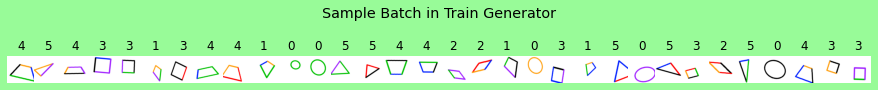

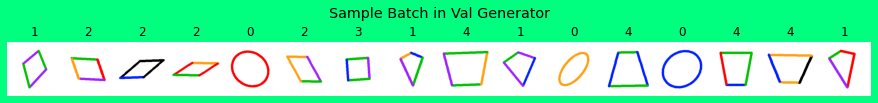

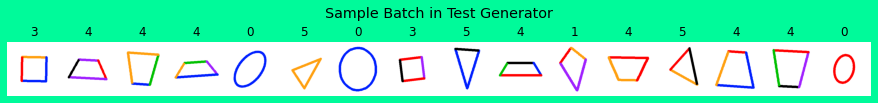

In [ ]:
# Take a sample batch file
idx_train = random.randrange(len(train_generator))
idx_val = random.randrange(len(val_generator))
idx_test = random.randrange(len(test_generator))

# Displays an image with label for the train, test and val generator
list_train_img, list_train_lb = train_generator[idx_train]
list_val_img, list_val_lb = val_generator[idx_val]
list_test_img, list_test_lb = val_generator[idx_test]

# The number of images must be less than or equal to the batch size
def show_img_horizontal(title, color, list_img, list_lb, num_img):
  fig = plt.figure(figsize=(12,1.8), facecolor=color)
  fig.suptitle(title, fontsize='x-large')
  axs = fig.subplots(1, num_img)
  fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
  for i in range(num_img):
    axs[i].imshow(list_img[i])
    axs[i].axis('off')
    axs[i].title.set_text(np.argmax(list_lb[i]))

# Show image in train generator
show_img_horizontal(
    'Sample Batch in Train Generator',
    'palegreen',
    list_train_img,
    list_train_lb,
    batch_train
)

# Show image in val generator
show_img_horizontal(
    'Sample Batch in Val Generator',
    'springgreen',
    list_val_img,
    list_val_lb,
    batch_val
)

# Show image in test generator
show_img_horizontal(
    'Sample Batch in Test Generator',
    'mediumspringgreen',
    list_test_img,
    list_test_lb,
    batch_test
)

<table>
  <tr>
    <th colspan="6">Label Code</th>
  </tr>
  <tr align="center">
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Circle</td>
    <td>Kite</td>
    <td>Parallelogram</td>
    <td>Square</td>
    <td>Trapezoid</td>
    <td>Triangle</td>
  </tr>
</table>

## Define Model with Basic CNN and DNN

In [ ]:
model = tf.keras.models.Sequential([
    # CNN
    tf.keras.layers.Conv2D(8, (5,5), activation='relu', input_shape=size_input+(3,)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 220, 220, 8)       608       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 110, 110, 8)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 106, 106, 16)      3216      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 53, 53, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 49, 49, 32)        12832     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 22, 22, 64)       

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

### Training Model

In [ ]:
class callback_acc(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.995 and logs.get('val_acc') > 0.995):
      self.model.stop_training = True

callback_acc = callback_acc()
callback_es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[callback_acc, callback_es],
    verbose=1
)

Epoch 1/15
563/563 [==============================] - 226s 400ms/step - loss: 1.4001 - acc: 0.4166 - val_loss: 0.5739 - val_acc: 0.8080
Epoch 2/15
563/563 [==============================] - 228s 405ms/step - loss: 0.7343 - acc: 0.7399 - val_loss: 0.1188 - val_acc: 0.9637
Epoch 3/15
563/563 [==============================] - 231s 409ms/step - loss: 0.4514 - acc: 0.8493 - val_loss: 0.0612 - val_acc: 0.9857
Epoch 4/15
563/563 [==============================] - 227s 404ms/step - loss: 0.3271 - acc: 0.8972 - val_loss: 0.0394 - val_acc: 0.9930
Epoch 5/15
563/563 [==============================] - 223s 397ms/step - loss: 0.2648 - acc: 0.9176 - val_loss: 0.0096 - val_acc: 0.9987
Epoch 6/15
563/563 [==============================] - 224s 398ms/step - loss: 0.2170 - acc: 0.9347 - val_loss: 0.0264 - val_acc: 0.9923
Epoch 7/15
563/563 [==============================] - 227s 403ms/step - loss: 0.1868 - acc: 0.9433 - val_loss: 0.0087 - val_acc: 0.9977
Epoch 8/15
563/563 [============================

### Plot Accuracy and Lose

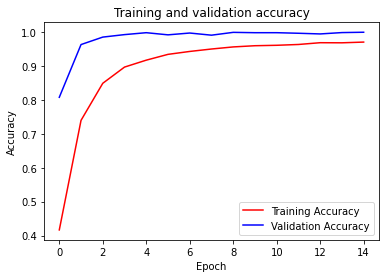

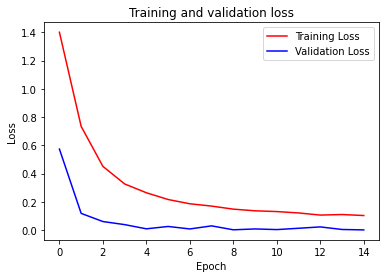

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Test Accuracy Model

In [ ]:
loss = model.evaluate(test_generator, steps=len(test_generator))

188/188 [==============================] - 5s 28ms/step - loss: 0.0019 - acc: 0.9997


#### Visualize accuracy each label or class with confusion matrix 
reference : https://datatofish.com/confusion-matrix-python/

In [ ]:
# Create new test generator with shuffle=False
new_test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=batch_test,
    class_mode='categorical',
    target_size=size_input,
    shuffle=False # important part
)
new_test_generator.classes

Found 3000 images belonging to 6 classes.


array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [ ]:
predictions = model.predict(new_test_generator, steps=len(new_test_generator))

In [ ]:
# [FIXED] Problem order classes with set shuffle=False in test_generator
predictions_lb = np.argmax(predictions,axis=1)

In [ ]:
labels = new_test_generator.classes
confusion_matrix = tf.math.confusion_matrix(labels, predictions_lb)
print(confusion_matrix)

tf.Tensor(
[[500   0   0   0   0   0]
 [  0 500   0   0   0   0]
 [  0   0 499   1   0   0]
 [  0   0   0 500   0   0]
 [  0   0   0   0 500   0]
 [  0   0   0   0   0 500]], shape=(6, 6), dtype=int32)


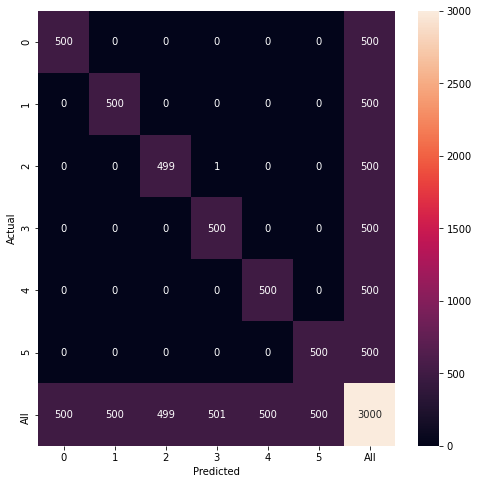

In [ ]:
data = {'y_Actual': labels,
        'y_Predicted': predictions_lb
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
plt.figure(figsize = (8,8))
sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

<table>
  <tr>
    <th colspan="6">Label Code</th>
  </tr>
  <tr align="center">
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Circle</td>
    <td>Kite</td>
    <td>Parallelogram</td>
    <td>Square</td>
    <td>Trapezoid</td>
    <td>Triangle</td>
  </tr>
</table>

More Details

In [ ]:
report = metrics.classification_report(
    labels, 
    predictions_lb, 
    target_names=label
)
print(report)

               precision    recall  f1-score   support

       circle       1.00      1.00      1.00       500
         kite       1.00      1.00      1.00       500
parallelogram       1.00      1.00      1.00       500
       square       1.00      1.00      1.00       500
    trapezoid       1.00      1.00      1.00       500
     triangle       1.00      1.00      1.00       500

     accuracy                           1.00      3000
    macro avg       1.00      1.00      1.00      3000
 weighted avg       1.00      1.00      1.00      3000



=====================================

## Exporting and Optimization to TFJs
Reference :  
- https://medium.com/hackernoon/tf-serving-keras-mobilenetv2-632b8d92983c
- https://itnext.io/shrink-your-tensorflow-js-web-model-size-with-weight-quantization-6ddb4fcb6d0d

In [ ]:
# Specifies the model directory
model_dir = '/tmp/model'
try:
  os.mkdir(model_dir)
except OSError as e:
  print("\nUnable create directory. {}".format(e))

In [ ]:
# Save model .h5
model_name = "model_v2"
model.save(model_dir+f"/{model_name}.h5")

In [ ]:
# Download model .h5, for backup
files.download('/tmp/model/model_v2.h5')

print('`model_v2.h5` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`model_v2.h5` has been downloaded


Export .h5 model to tfjs model  
Reference : https://huningxin.github.io/tfjs-converter/

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_layers_model \
    /tmp/model/model_v2.h5 \
    /tmp/tfjs_float_model

Optimization using quantization  
Reference : https://stackoverflow.com/questions/63949766/how-can-i-quantize-a-keras-model-while-converting-it-to-a-tensorflowjs-layers-mo



In [ ]:
!tensorflowjs_converter \
    --quantize_uint8 \
    --input_format=keras \
    --output_format=tfjs_layers_model \
    /tmp/model/model_v2.h5 \
    /tmp/tfjs_quant_model

### Download TFJs Model

In [ ]:
!zip -r /tmp/tfjs_float_model_v2.zip /tmp/tfjs_float_model

updating: tmp/tfjs_float_model/ (stored 0%)
updating: tmp/tfjs_float_model/group1-shard1of1.bin (deflated 7%)
updating: tmp/tfjs_float_model/model.json (deflated 87%)


In [ ]:
# Download the model
files.download('/tmp/tfjs_float_model_v2.zip')

print('`tfjs_float_model_v2.zip` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`tfjs_float_model_v2.zip` has been downloaded


In [ ]:
!zip -r /tmp/tfjs_quant_model_v2.zip /tmp/tfjs_quant_model

updating: tmp/tfjs_quant_model/ (stored 0%)
updating: tmp/tfjs_quant_model/group1-shard1of1.bin (deflated 24%)
updating: tmp/tfjs_quant_model/model.json (deflated 85%)


In [ ]:
# Download the model
files.download('/tmp/tfjs_quant_model_v2.zip')

print('`tfjs_quant_model_v2.zip` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`tfjs_quant_model_v2.zip` has been downloaded
